# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
#!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [2]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics
# Display images using OpenCV
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

2024-08-07 13:58:46.987135: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-07 13:58:46.987229: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-07 13:58:47.144075: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Loading the dataset

In [3]:
# Commenting google drive import as running the notebook on Kaggle Kernel 
#from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# Load the image file of dataset
images = np.load('/kaggle/input/labels/images.npy')

# Load the labels file of dataset
labels = pd.read_csv('/kaggle/input/labels/Labels.csv')

## Data Overview

### Understand the shape of the dataset

In [5]:
# Print the shape of the dataset
print(labels.shape)
print(images.shape)

(4750, 1)
(4750, 128, 128, 3)


The given dataset contains 4750 images, with the corresponding labels matching the number of images.

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

In [6]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

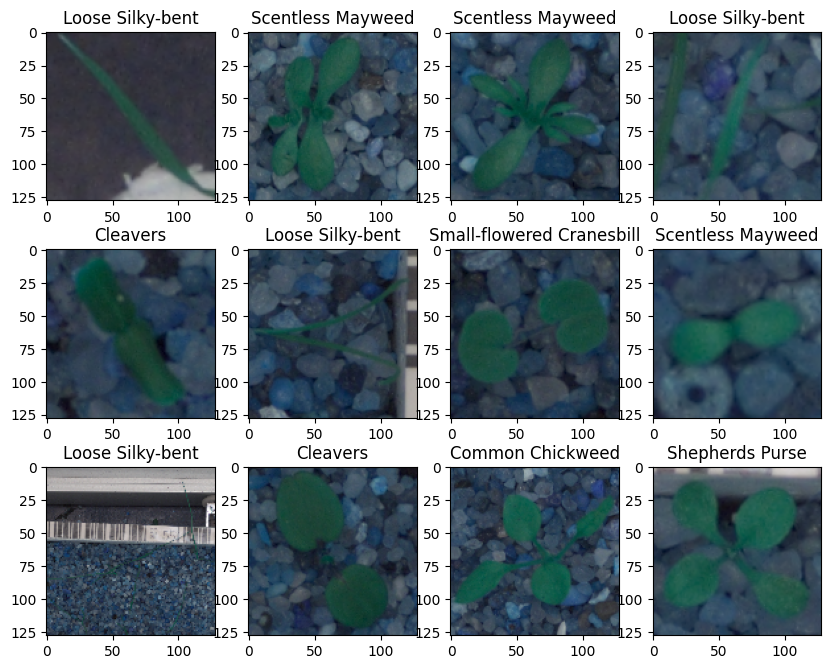

In [7]:
plot_images(images, labels)

### Check the distribution of the target variable

In [8]:
# Get the count of each species
labels['Label'].value_counts()

Label
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

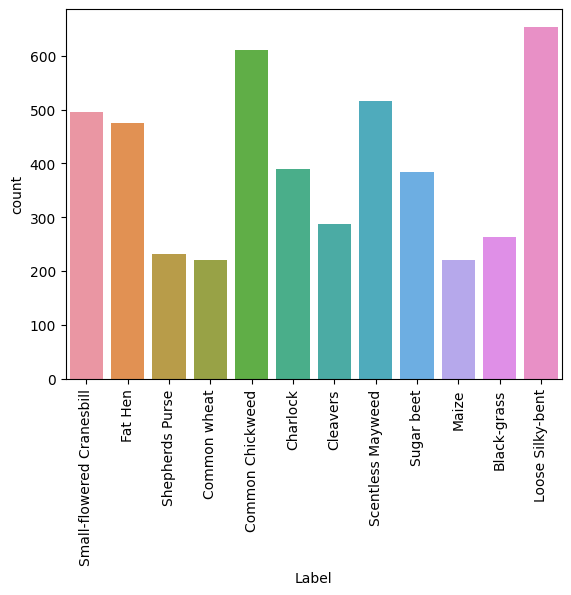

In [9]:
# Plot the graph of distribution of each class
sns.countplot(x=labels['Label'])
plt.xticks(rotation='vertical')

#### Observations

The summary above provides an overview of plant species distribution within a dataset, showing the counts of each species.

- There are 12 distinct species.  
- "Loose Silky-bent" is the most prevalent with 654 occurences.
- "Common Chickweed", "Scentless Mayweed," and "Small-flowered Cranesbill," and  also have significant representations, with counts of 611, 516, and 496, respectively, indicating they are common in this dataset.
- "Common wheat" and "maize" are the least common with 221 occurences each.




#### Imbalance Assessment

The provided counts and the generated bar plot reveal some degree of imbalance in the dataset. "Loose Silky-bent" and "Common Chickweed" are the most represented species, with over 600 images each, while "Common wheat" and "Maize" are among the least represented, with 221 images each.

Implications of Imbalance: An imbalanced dataset can lead to a model that performs well on overrepresented classes but poorly on underrepresented ones. This occurs because the model has more examples to learn from for the former and fewer for the latter, potentially leading to biases in prediction.

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [10]:
# Convert images from BGR to RGB with OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)


### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [11]:
images_decreased=[]
height = 64
width =  64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

#### Images before resizing

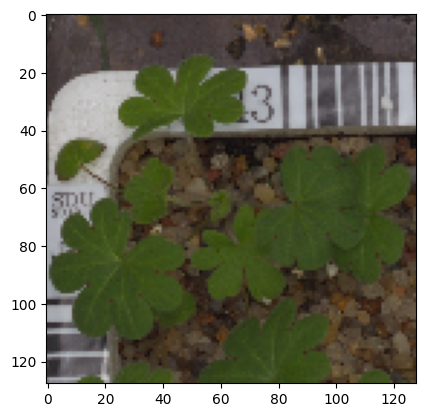

In [12]:
plt.imshow(images[3])

#### Images after resizing

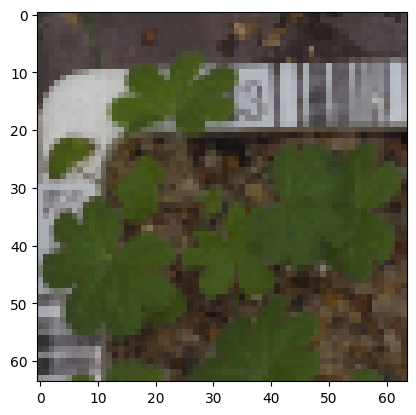

In [13]:
plt.imshow(images_decreased[3])

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [14]:
# Split the dataset. Training = 80%, Validation = 10%, Testing = 10%
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp , test_size=0.11, random_state=42,stratify=y_temp)

In [15]:
# Check the shape of train, validation and test data
print(X_train.shape,y_train.shape)
print(X_val.shape, y_val.shape)
print(y_test.shape,y_test.shape)

(3804, 128, 128, 3) (3804, 1)
(471, 128, 128, 3) (471, 1)
(475, 1) (475, 1)


### Encode the target labels

In [16]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)


In [17]:
# Check the shape of train, validation and test data
y_train_encoded.shape,y_val_encoded.shape,y_test_encoded.shape

((3804, 12), (471, 12), (475, 12))

### Data Normalization

As **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we will **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [18]:
# Normalize the image pixels of train, test and validation data
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model 1

In [19]:
# Clearing backend
backend.clear_session()

In [20]:
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [21]:
# Intializing a sequential model
model1 = Sequential()

# Add the first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))

# Add the max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

#Create two similar convolution and max-pooling layers activation = relu
model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Flatten the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Add a fully connected dense layer with 16 neurons
model1.add(Dense(100, activation='relu'))
model1.add(Dropout(0.3))

# Add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(12, activation='softmax'))

# Use the Adam Optimizer
opt=Adam()

# Compile the model using suitable metric for loss fucntion
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generate the summary of the model
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       819,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         1,212 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 850,016 (3.24 MB)

 Trainable params: 850,016 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

#### Fitting the model on the train data

In [22]:
# Fit the model on train and also use the validation data for validation
history_1 = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30


I0000 00:00:1723039156.097304     112 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1723039156.118673     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1723039163.909320     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1723039164.967269     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


119/119 - 19s - 161ms/step - accuracy: 0.2716 - loss: 2.1405 - val_accuracy: 0.4374 - val_loss: 1.6212
Epoch 2/30


W0000 00:00:1723039166.633684     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


119/119 - 2s - 15ms/step - accuracy: 0.4508 - loss: 1.5913 - val_accuracy: 0.5329 - val_loss: 1.3652
Epoch 3/30
119/119 - 2s - 16ms/step - accuracy: 0.5497 - loss: 1.2893 - val_accuracy: 0.6709 - val_loss: 1.0452
Epoch 4/30
119/119 - 2s - 15ms/step - accuracy: 0.6485 - loss: 1.0080 - val_accuracy: 0.7197 - val_loss: 0.8803
Epoch 5/30
119/119 - 2s - 15ms/step - accuracy: 0.7061 - loss: 0.8556 - val_accuracy: 0.7176 - val_loss: 0.9194
Epoch 6/30
119/119 - 2s - 16ms/step - accuracy: 0.7495 - loss: 0.7087 - val_accuracy: 0.7452 - val_loss: 0.8147
Epoch 7/30
119/119 - 2s - 15ms/step - accuracy: 0.7808 - loss: 0.6157 - val_accuracy: 0.7431 - val_loss: 0.7887
Epoch 8/30
119/119 - 2s - 15ms/step - accuracy: 0.8123 - loss: 0.5352 - val_accuracy: 0.7410 - val_loss: 0.8053
Epoch 9/30
119/119 - 2s - 15ms/step - accuracy: 0.8239 - loss: 0.4672 - val_accuracy: 0.7282 - val_loss: 0.8968
Epoch 10/30
119/119 - 2s - 15ms/step - accuracy: 0.8333 - loss: 0.4421 - val_accuracy: 0.7495 - val_loss: 0.8237
Ep

#### Model Evaluation

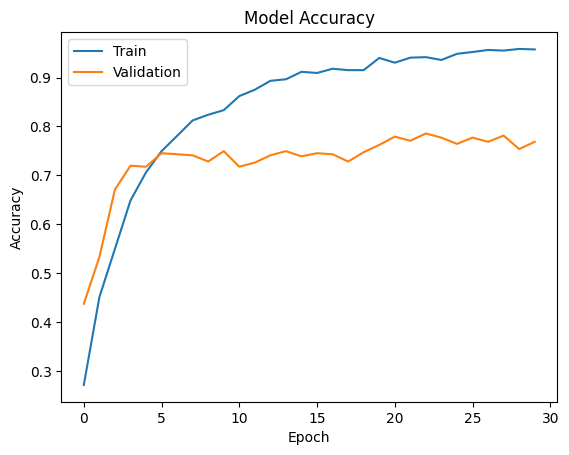

In [23]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [24]:
accuracy = model1.evaluate(X_test, y_test_encoded, verbose=2)

W0000 00:00:1723039222.161853     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


15/15 - 2s - 166ms/step - accuracy: 0.6800 - loss: 308.8153


#### Plotting the confusion matrix

In [25]:
# Output the probabilities of each class
y_pred=model1.predict(X_test)

 1/15 ━━━━━━━━━━━━━━━━━━━━ 5s 381ms/step

W0000 00:00:1723039224.346870     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


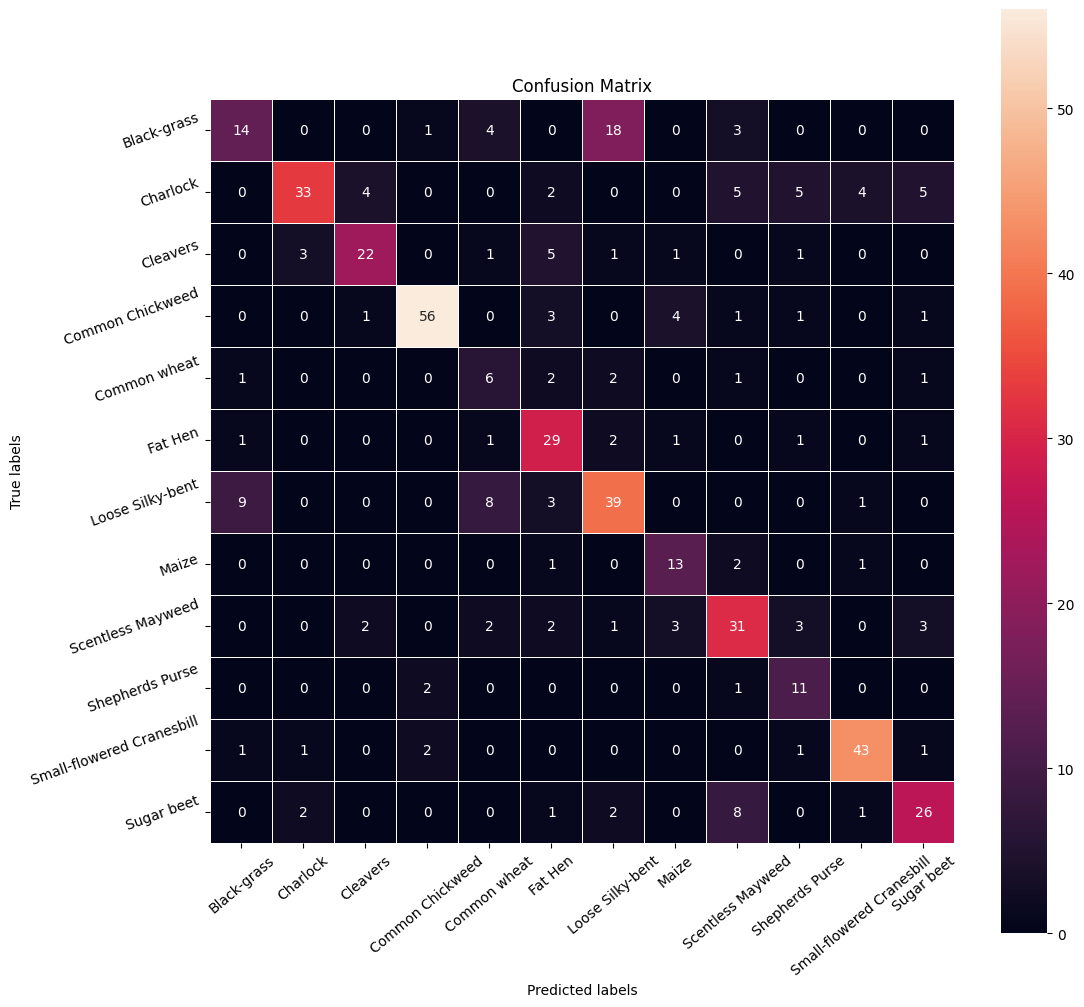

In [26]:
# Categorical values from y_test_encoded and y_pred

y_pred_arg= np.argmax(y_pred,axis=1)
y_test_arg= np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_pred_arg,y_test_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

#### Plotting classification report

In [27]:
# Plot classification report
cr=metrics.classification_report(y_pred_arg,y_test_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.54      0.35      0.42        40
           1       0.85      0.57      0.68        58
           2       0.76      0.65      0.70        34
           3       0.92      0.84      0.88        67
           4       0.27      0.46      0.34        13
           5       0.60      0.81      0.69        36
           6       0.60      0.65      0.62        60
           7       0.59      0.76      0.67        17
           8       0.60      0.66      0.63        47
           9       0.48      0.79      0.59        14
          10       0.86      0.88      0.87        49
          11       0.68      0.65      0.67        40

    accuracy                           0.68       475
   macro avg       0.65      0.67      0.65       475
weighted avg       0.70      0.68      0.68       475



#### Observations on  Model 1

We observe that validation accuracy has nearly plateaued around 75% after 6th epoch. The accuracy on the training dataset continued to improve very slowly after 15th epoch, indicating the onset of overfitting. The difference between training and validation accuracy highlights the importance of ensuring a well-balanced and representative validation set for accurate model assessment.

## Model 2: Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [55]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [56]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [57]:
# Set the rotation_range to 20
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

In [58]:
# Intializing a sequential model
model2 = Sequential()

# Add the first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))
# Code to add max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))


model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))

# Add batch normalizatoin
model2.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model2.add(Dense(16, activation='relu'))

# add dropout with dropout_rate=0.3
model2.add(Dropout(0.3))
#Add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Iinitialize Adam Optimimzer
opt=Adam()
# Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │       524,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 544,892 (2.08 MB)

 Trainable params: 544,828 (2.08 MB)

 Non-trainable params: 64 (256.00 B)

#### Fitting the model on the training data

In [59]:
# fit the model on train data
epochs = 40
# Batch size
batch_size = 32

history = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       shuffle=False),
                                       epochs=epochs,
                                       steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 145ms/step - accuracy: 0.1975 - loss: 2.3496 - val_accuracy: 0.1847 - val_loss: 2.4016 - learning_rate: 0.0010
Epoch 2/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4062 - loss: 2.1939 - val_accuracy: 0.2378 - val_loss: 2.4021 - learning_rate: 0.0010
Epoch 3/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 13s 104ms/step - accuracy: 0.4048 - loss: 1.8444 - val_accuracy: 0.3737 - val_loss: 2.1670 - learning_rate: 0.0010
Epoch 4/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.4375 - loss: 1.7974 - val_accuracy: 0.3822 - val_loss: 2.1294 - learning_rate: 0.0010
Epoch 5/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 13s 102ms/step - accuracy: 0.4519 - loss: 1.6318 - val_accuracy: 0.4246 - val_loss: 1.9646 - learning_rate: 0.0010
Epoch 6/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.4688 - loss: 1.4741 - val_accuracy: 0.3503 - val_loss: 1.9566 - learning_rate: 0.0010
Epoch 7/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 13s 103ms/step - accuracy: 0.5147 -

#### Model Evaluation

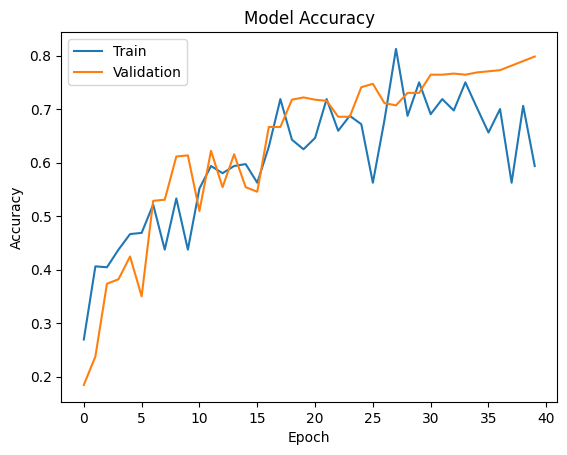

In [60]:
# Plot the graphs for training accuracy and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Evaluate the model on test data

In [61]:
# Evaluate model on test data
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - 29ms/step - accuracy: 0.7663 - loss: 0.7456


#### Plotting the confusion matrix

In [62]:
# Output the probabilities of each class
y_pred=model2.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


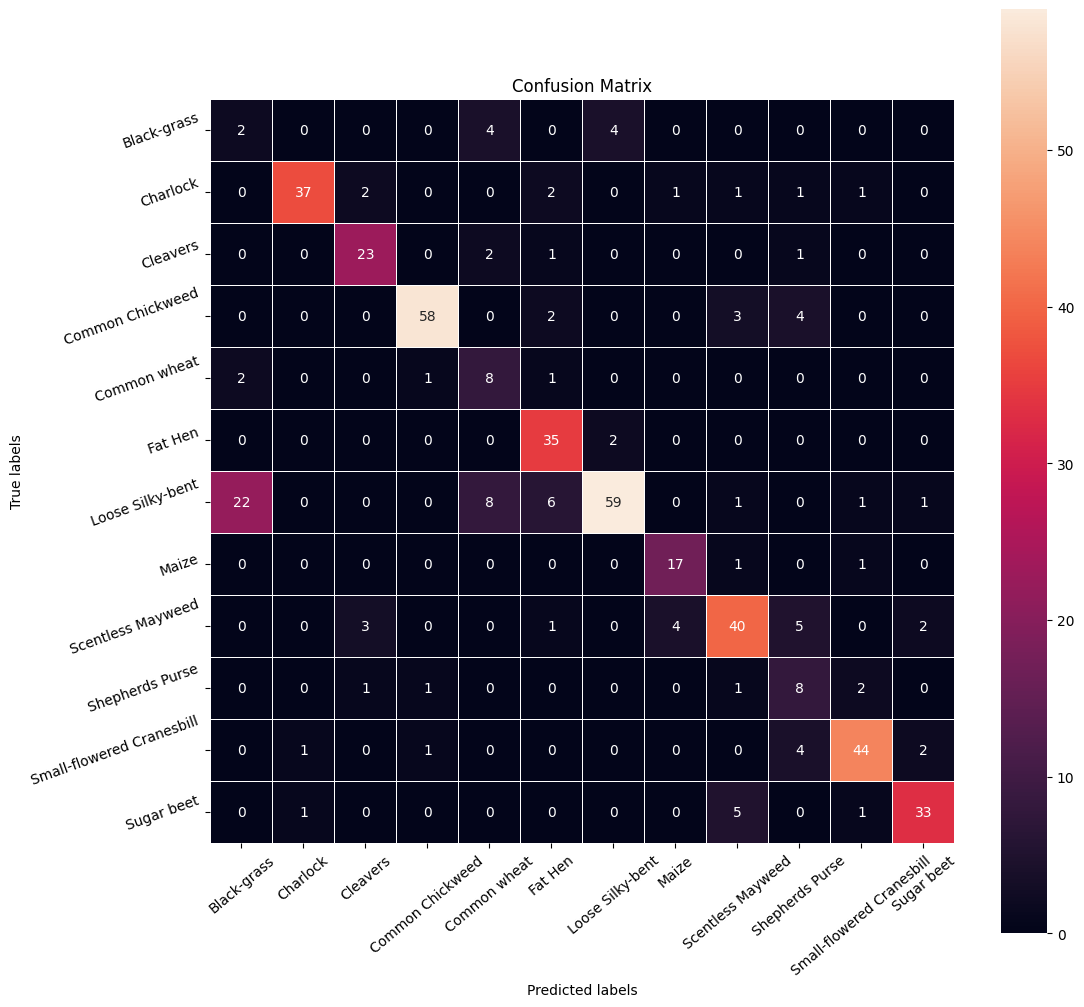

In [63]:
# Categorical values from y_test_encoded and y_pred

y_pred_arg= np.argmax(y_pred,axis=1)
y_test_arg= np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_pred_arg,y_test_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

#### Plotting classification report

In [69]:
# Plot classification report
cr=metrics.classification_report(y_pred_arg,y_test_arg)
print(cr)
print(enc.classes_) # Also print the classes


              precision    recall  f1-score   support

           0       0.08      0.20      0.11        10
           1       0.95      0.82      0.88        45
           2       0.79      0.85      0.82        27
           3       0.95      0.87      0.91        67
           4       0.36      0.67      0.47        12
           5       0.73      0.95      0.82        37
           6       0.91      0.60      0.72        98
           7       0.77      0.89      0.83        19
           8       0.77      0.73      0.75        55
           9       0.35      0.62      0.44        13
          10       0.88      0.85      0.86        52
          11       0.87      0.82      0.85        40

    accuracy                           0.77       475
   macro avg       0.70      0.74      0.71       475
weighted avg       0.82      0.77      0.78       475

['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Sh

#### Observations on model 2

In this model, we observe that although the validation accuracy is increasing, the training accuracy shows significant variability. We reduce the learning rate whenever the validation accuracy plateaus. Additionally, we use batch normalization and apply a dropout rate of 0.2. However, this combination does not substantially improve the model's performance.

## Final Model

We tried to improve the model's performance by reducing the learning rate, applying dropout, and using batch normalization. However, these adjustments did not lead to significant improvements. With my GPU quota on Google Colab exhausted and experimentation with different parameter combinations running extremely slowly on my laptop, I will proceed with Model 1 as my final choice of model.

### Visualizing the prediction

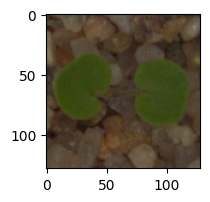

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


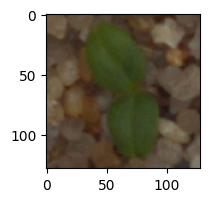

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Label ['Cleavers']
True Label Cleavers


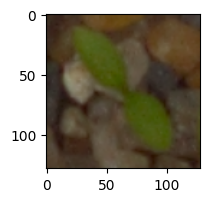

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


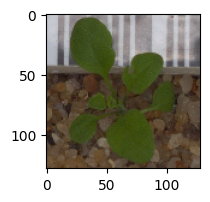

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Label ['Charlock']
True Label Shepherds Purse


In [66]:

final_model = model1

# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
## Predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(final_model.predict((X_test_normalized[2].reshape(1,128,128,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
## Predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(final_model.predict((X_test_normalized[33].reshape(1,128,128,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
## Predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(final_model.predict((X_test_normalized[59].reshape(1,128,128,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
## Predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(final_model.predict((X_test_normalized[36].reshape(1,128,128,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])

## Actionable Insights and Business Recommendations

- **Images Collection**
Our exploratory data analysis (EDA) revealed that some plant species are underrepresented or poorly performing classes. To ensure a well-represented dataset, consider utilizing crowd-sourced image collection, or acquiring images from other sources.

- **Build an App/Website**
Based on the model's inferences, develop a mobile app or website where users can upload images. The app/website will classify the images, helping users distinguish weeds from actual plants.

- **Use Model Inference in Agriculture**
Leverage model inferences to guide resource allocation in agriculture. For example, by analyzing a series of images taken from a farm, the model can identify species and determine the percentage composition of each species.

- **Continuous Model Evaluation**
Establish a continuous evaluation framework to regularly assess model performance against new images. This will ensure the model remains effective as new plant species are introduced or as existing species undergo changes.

- **Model Performance Optimization**
The models show varying degrees of success across different plant species. For instance, species like 'Charlock' and 'Common Chickweed' exhibit high precision and recall, indicating that the model effectively learns specific features. The model can be further optimized using transfer learning.

*

_____